<h1 style="text-align:  center;">Введение в анализ данных</h1>

<h1 style="text-align:center;">LAB2</h1>

Цель работы: изучение связи между признаками двумерного набора данных.

Содержит информацию о сердечных болезнях.
1.	возраст
2.	пол
3.	тип боли в груди (4 значения [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: неангинальная боль, ASY: бессимптомная])
4.	артериальное давление в покое
5.	холестерин сыворотки в мг/дл
6.	уровень сахара в крови натощак > 120 мг/дл
7.	ЭКГ в покое: результаты электрокардиограммы в покое норма: нормальная, ST: аномалия ST-T LVN: гипертрофия
8.	MaxHR: максимальная достигнутая частота сердечных сокращений [Числовое значение от 60 до 202]
9.	стенокардия, вызванная физической нагрузкой (да, нет)
10.	 oldpeak = депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
11.	наклон пикового сегмента ST при нагрузке (Вверх: восходящий, Плоский: плоский, Вниз: нисходящий)
12.	 HeartDisease: выходной класс [1: болезнь сердца, 0: нормальный]

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

heart_df = pd.read_csv('3heart.csv', sep=',')

print('\n', "Редактирование ошибок: В процессе", '\n')
heart_df = heart_df.drop_duplicates()

heart_df = heart_df.dropna()

heart_df.reset_index(drop=True, inplace=True)

heart_df["Sex"] = heart_df["Sex"].replace('Ma', 'M')
heart_df["RestingBP"] = heart_df["RestingBP"].replace('0', '100')
heart_df["Cholesterol"] = heart_df["Cholesterol"].replace('0', '200')
heart_df["Cholesterol"] = heart_df["Cholesterol"].replace('a241', '241')
heart_df["ST_Slope"] = heart_df["ST_Slope"].replace('UP', 'Up')
heart_df['Cholesterol'] = heart_df['Cholesterol'].astype('int64')

print('\n', "Редактирование ошибок: Завершено", '\n')


 Редактирование ошибок: В процессе 


 Редактирование ошибок: Завершено 



Провел первичную обработку данных, по примеру лр1. Далее построил матрицу диаграмм рассеяния по столбцам: Sex, Age, Cholesterol, RestingBP. 

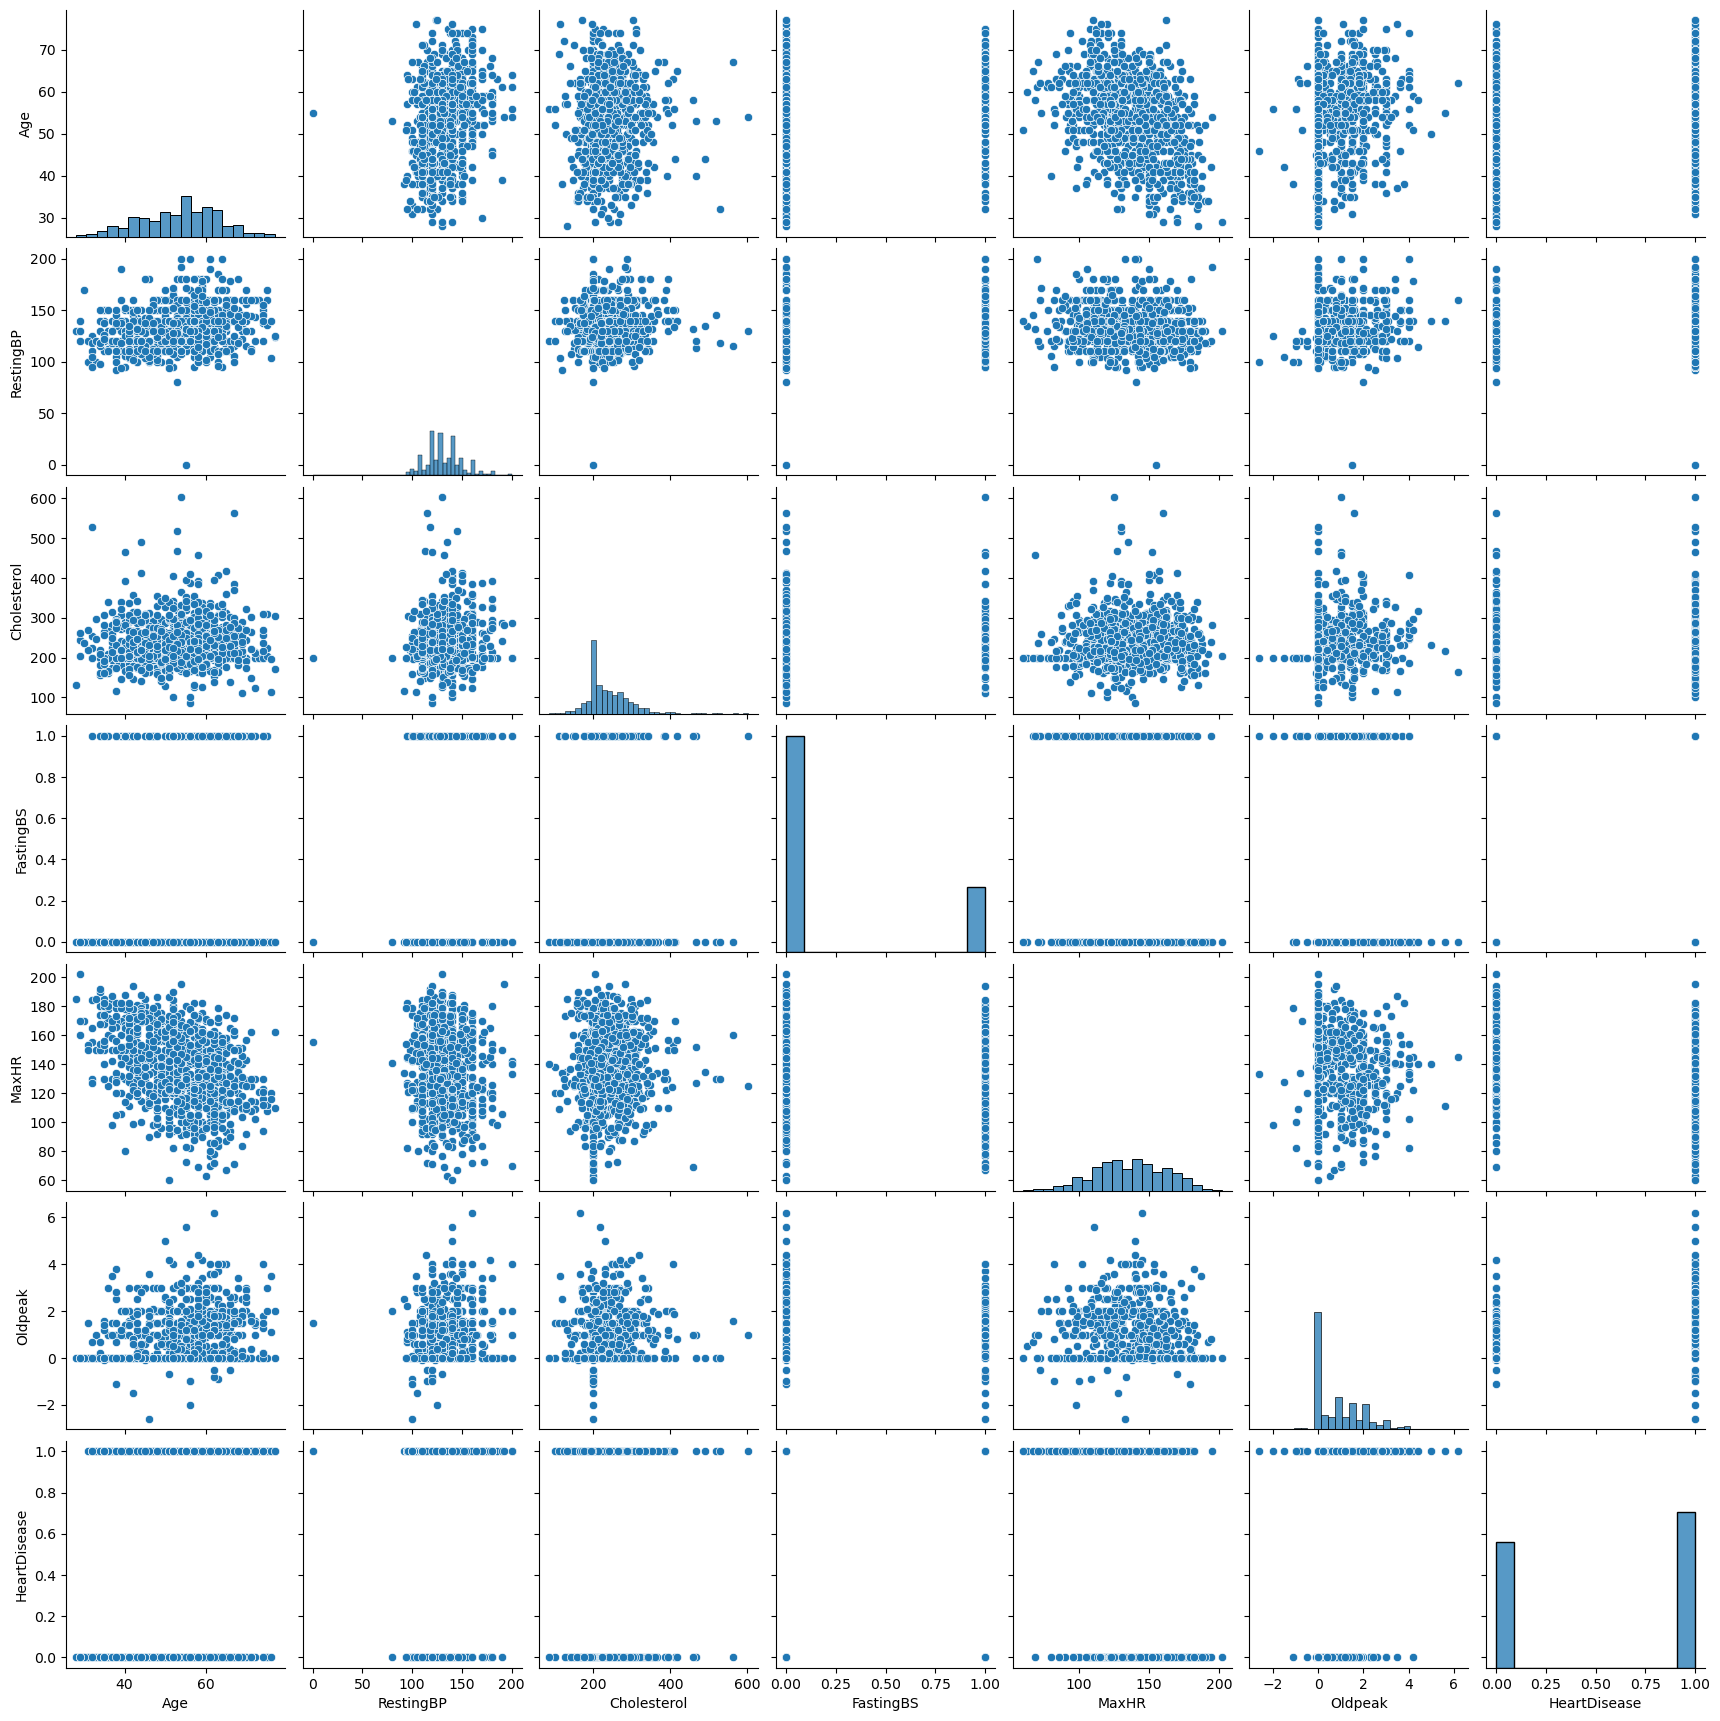

In [8]:
sns.pairplot(heart_df)

plt.show()

Взаимосвязи по большей степени не наблюдается. Существуют отдельные прецеденты, как Age и MaxHR, где слабо заметна линейная взаимосвязь. Проведем анализ кореляции и выведем таблично и тепловой картой

                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  HeartDisease
Age           1.000000   0.253976     0.006183   0.196460 -0.381165  0.256273      0.279522
RestingBP     0.253976   1.000000     0.098229   0.069555 -0.111717  0.163957      0.107218
Cholesterol   0.006183   0.098229     1.000000  -0.059940  0.070935  0.058347     -0.010524
FastingBS     0.196460   0.069555    -0.059940   1.000000 -0.131028  0.052593      0.266146
MaxHR        -0.381165  -0.111717     0.070935  -0.131028  1.000000 -0.160209     -0.400866
Oldpeak       0.256273   0.163957     0.058347   0.052593 -0.160209  1.000000      0.402466
HeartDisease  0.279522   0.107218    -0.010524   0.266146 -0.400866  0.402466      1.000000


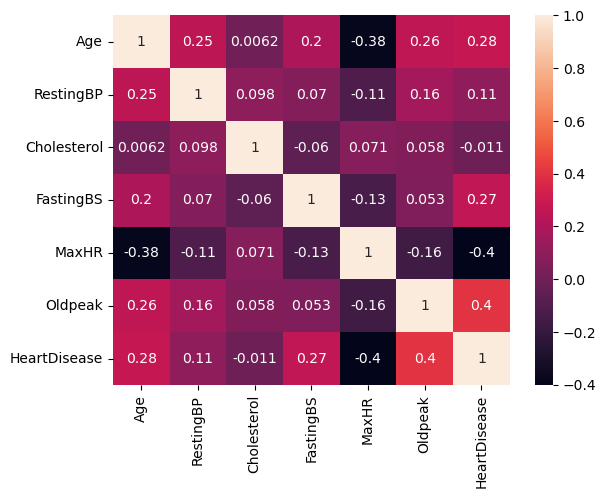

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # Вывод всех строк и колонок
    pd.options.display.expand_frame_repr = False  # Запрет на перенос
    print(heart_df.corr(method='pearson'))

df_pirs = heart_df.corr(method='pearson')
sns.heatmap(df_pirs, annot=True)

plt.show()

Сильных взаимосвязей не обнаружено, на можно выделить несколько сильнейших кореллирующих параметров: Oldpeak и HeartDisease, MaxHR и HeartDisease, MaxHR и Age.  

Проведем анализ ковариации.

In [11]:
df_cov = heart_df.cov()
print(df_cov)

                    Age   RestingBP  Cholesterol  FastingBS       MaxHR   Oldpeak  HeartDisease
Age           88.673672   44.271830     3.265106   0.782634  -91.391095  2.573497      1.308965
RestingBP     44.271830  342.668890   101.971846   0.544693  -52.656146  3.236607      0.987007
Cholesterol    3.265106  101.971846  3144.916639  -1.422031  101.287796  3.489396     -0.293481
FastingBS      0.782634    0.544693    -1.422031   0.178968   -1.411387  0.023727      0.055992
MaxHR        -91.391095  -52.656146   101.287796  -1.411387  648.316078 -4.350146     -5.075837
Oldpeak        2.573497    3.236607     3.489396   0.023727   -4.350146  1.137228      0.213436
HeartDisease   1.308965    0.987007    -0.293481   0.055992   -5.075837  0.213436      0.247303


<h3>Вывод</h3>

In [ ]:
Изучил связь между параметрами. Не выявил определенной корреляции между параметрами.